<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 3</center></b><h2>
<h3><b><center>Sistemas Jerárquicos de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 6 de Marzo de 2024</center><h5>
<h5><center><b>Entrega</b>: 19 de Marzo de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Mariana Gómez Cuartas
<br/>
<b>Cédula</b>: 1001011072
<br/>
<b>Última actualización</b>: abril 2
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba la idea de que es posible simular un  sistema de N-cuerpos jerarquicos usando un *árbol* de sistemas de 2 cuerpos.

En particular compararemos la predicción de las posiciones que para un sistema múltiple de estrellas nos da la simulación con un sistema jerárquico y el mismo resultado pero calculado como si el sistema fuera un sistema de N cuerpos completo.

**Procedimiento**:

El sistema que simularemos es el de un sistema binario formado por dos estrellas "s" y "e".  Alrededor de la estrella "e" gira un planeta "p", a cuyo alrededor, a su vez, gira una luna "L".  Los datos de los cuerpos, dados en unidades canónicas, en las que $U_M = 80$ M$_{\rm Jup}$, $U_L = 0.01$ au, son.

- Masas: s = 1, e = 0.5, L = 0.001, p = 0.01.

- Condiciones iniciales: a continuación se proveen datos del vector y velocidad relativa para cada subsistema:

   - Sistema p-L: $\vec r :(0.03,0,0), \vec v : (0,0.4,0.1)$

   - Sistema e-pL (baricentro de p y L): $\vec r :(0,0.4,0), \vec v : (0.9,0,0.2)$
     
  - Sistema s-epL (baricentro e y pL): $\vec r :(2,3,0), \vec v : (-0.2,0.7,0)$



Una vez definidas las condiciones iniciales:

1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase, indicando claramente el nombre de las variables que requiere para la construcción del sistema (vectores relativos, posiciones del centro de masa, etc.)

2. Simular usando `doscuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo para cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema. Determine esos períodos mediante la experimentación o con alguna estrategia numérica. Explique su método y estrategia claramente. El tiempo de la simulación de todo el sistema será igual al período más largo entre todos los subsistemas.

3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir de la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

4. Haga gráficos de las posiciones y una animación que muestre la trayectoria de las partículas.

5. Tomando las posiciones iniciales calculadas en 3, use la rutina  `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y compare con el obtenido en 4. ¿Se ven parecidas?

6. Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

7. Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades convencionales: en el eje x el tiempo en días, en el eje y la energía en Joules. ¿Qué observa?

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos solicitados en cada punto.

- Datos mínimos:
  - Números solicitados en cada punto.

- Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.

  - Gráfico de la energía cinética, potencial y total para la simulación de N-cuerpos (punto 5).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

In [178]:
!pip install -Uq pymcel celluloid

In [179]:
#@title Librerías

import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

In [180]:
#al momento de graficar en matplotlib para que la letra quede de un tamaño legible

plt.rcParams.update({'font.size': 14})

Comenzamos por definir las condiciones iniciales para los cuerpos presentados en el problema.

In [181]:
ms = 1
me = 0.5
mp = 0.01
ml = 0.001

m_sepl = ms + me + mp + ml
m_epl = m_sepl - ms
m_pl = m_epl - me

Definimos los vectores posición y velocidad realtiva para cada subsistema.

In [182]:
#s-epl
r_sepl = [2, 3, 0]
v_sepl = [-0.2, 0.7, 0]

#e-pl
r_epl = [0, 0.4, 0]
v_epl = [0.9, 0, 0.2]

#p-l
r_pl = [0.03, 0, 0]
v_pl = [0, 0.4, 0.1]

$$G = \frac{U_L^3}{U_M U_T^2}$$

In [183]:
G = pc.constantes.G

M_jupiter = 1.898e27      #kg
AU = 1.5e11               #m
UM = 80 * M_jupiter
UL = 0.01 * AU
UT = np.sqrt(UL ** 3 / (UM * G))

#1.
 Dibujar el árbol del sistema jerárquico como lo hicimos en clase, indicando claramente el nombre de las variables que requiere para la construcción del sistema (vectores relativos, posiciones del centro de masa, etc.)

Observación muy importante: el siguiente código fué solicitado a GEMINI AI para la impresion de imagenes a partir de un enlace de google drive permitiendo realizar modifiaciones de tamaño.

Yo podía realizarlo de una forma sencilla en una sola celda de texto, pero la imágen quedaba tan grande que era ilegible.

In [184]:
!pip install -q requests

In [185]:
import requests
from IPython.display import Image

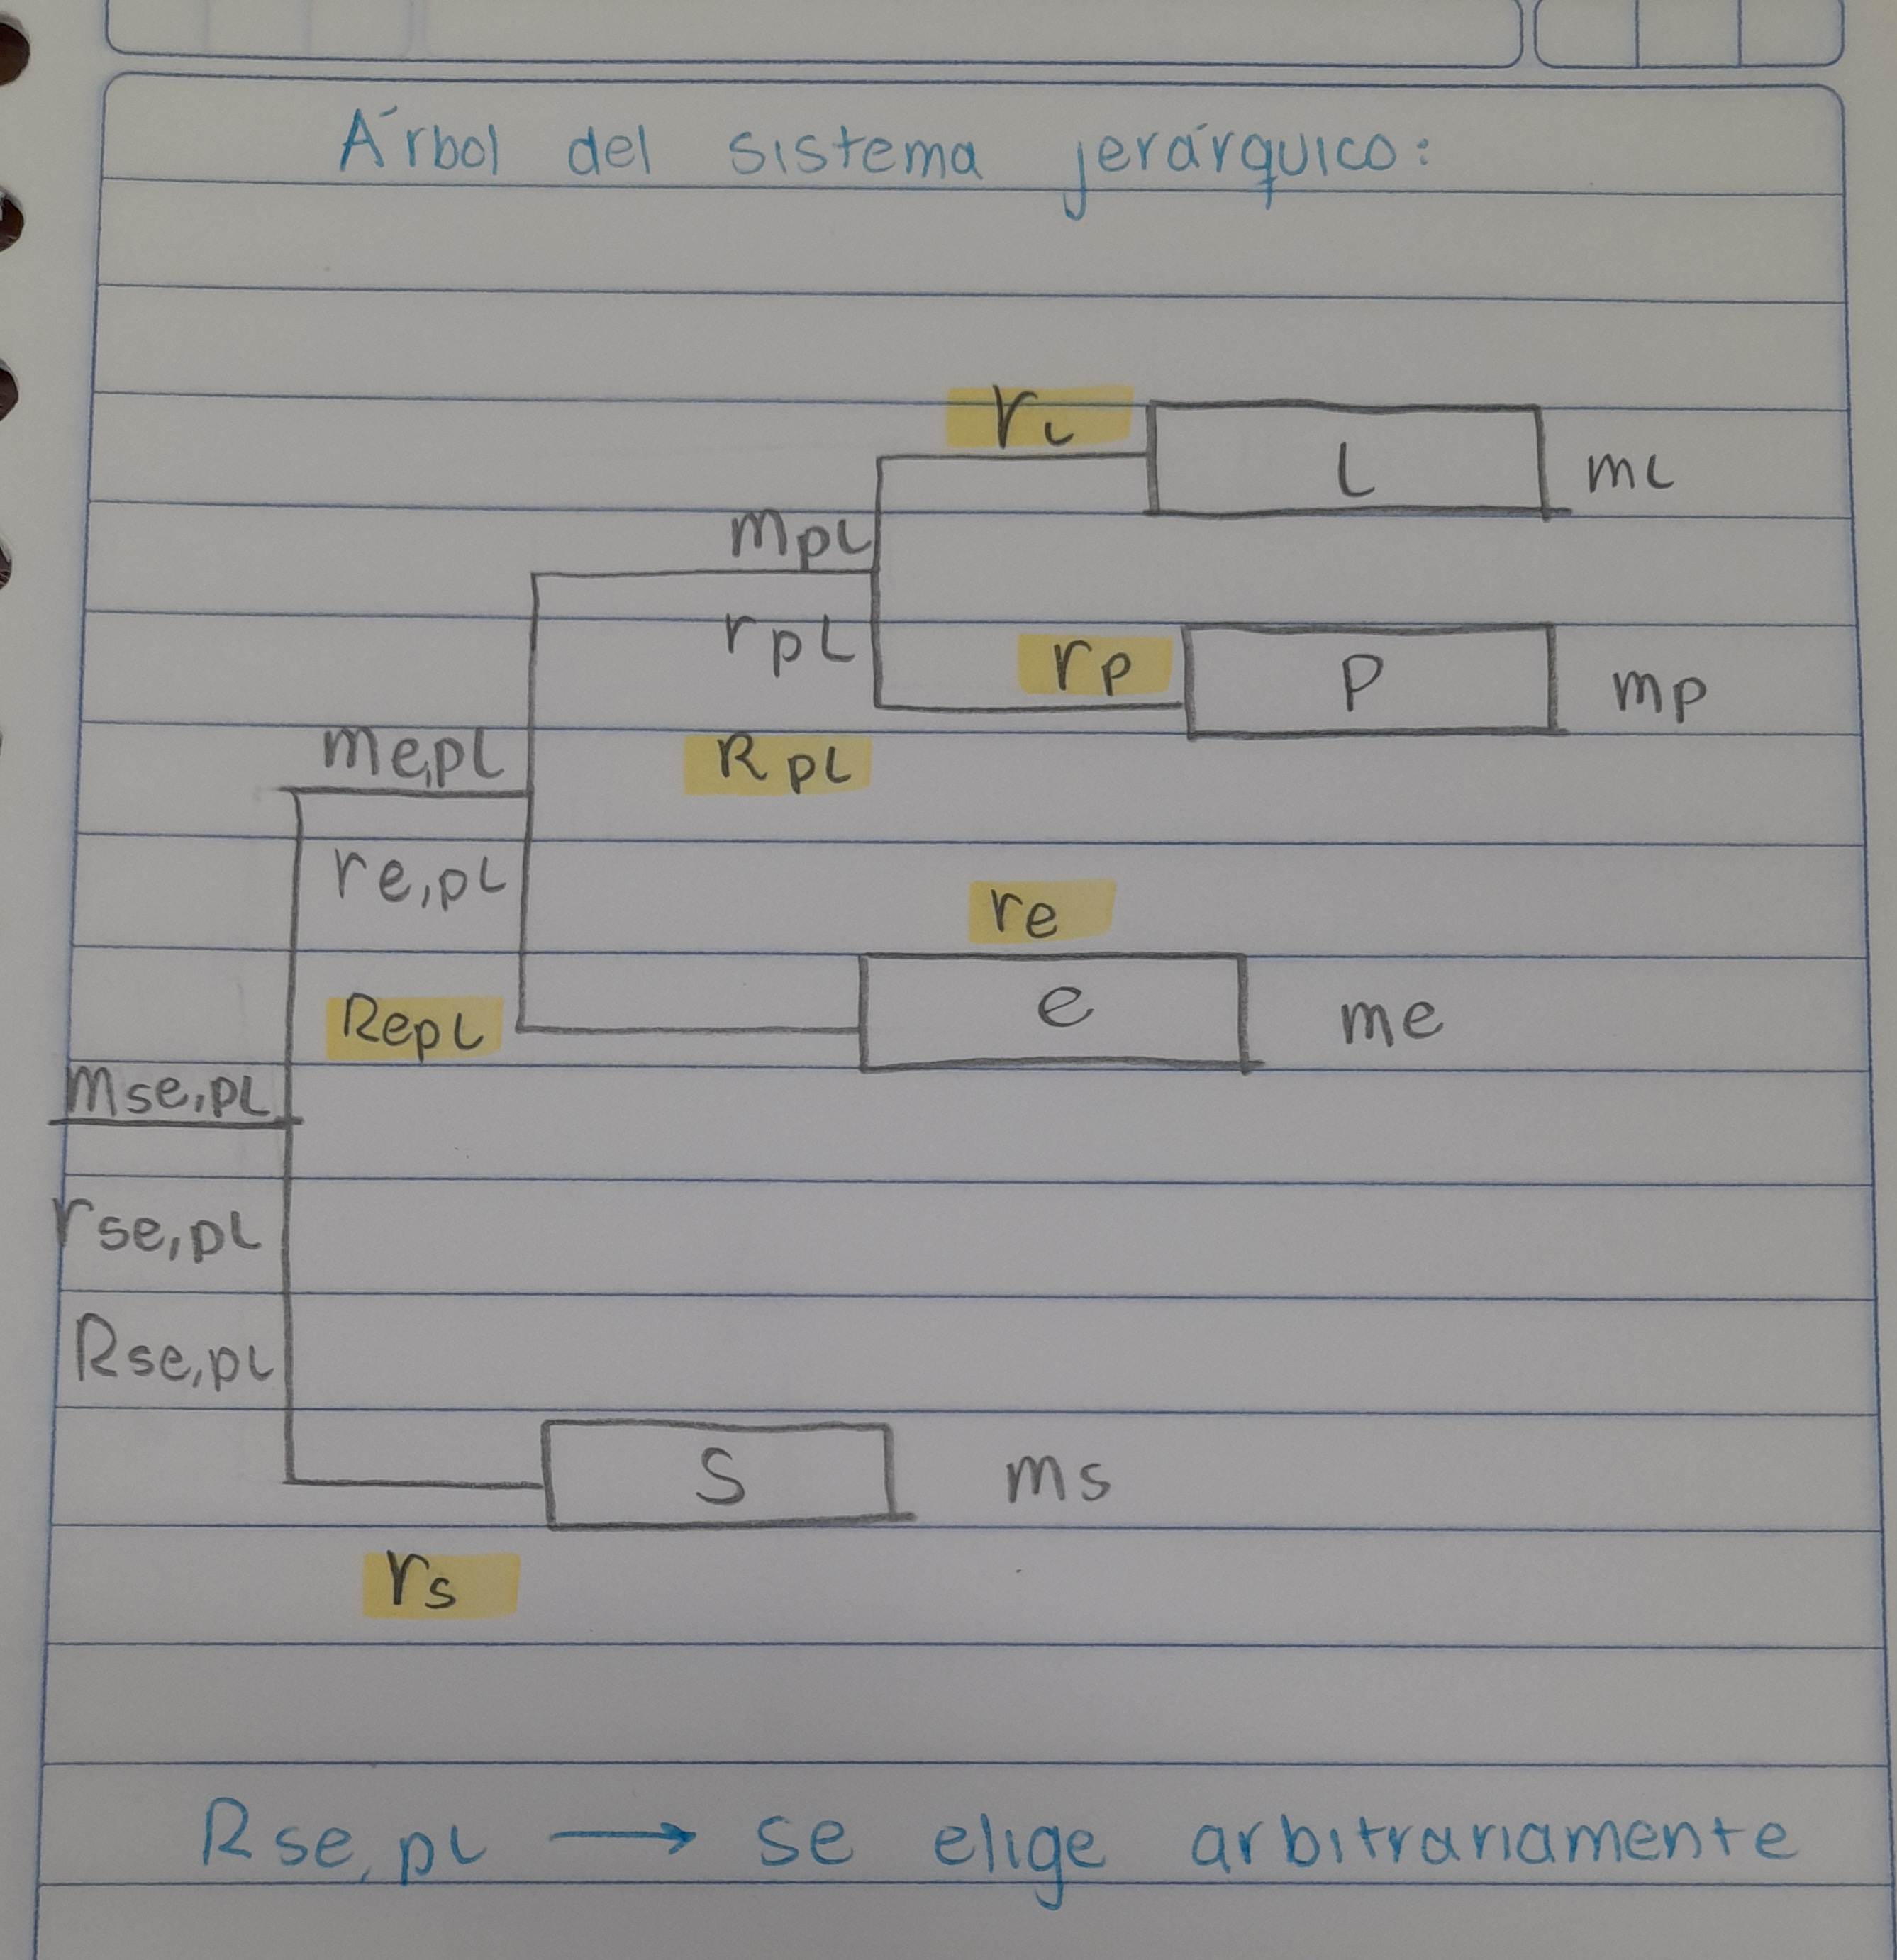

In [186]:
file_id = '1vxlWIAkht-YUj3i9pORfe020RskwnMEA' #se obtiene del enlace de google drive de la imagen
download_url = f'https://drive.google.com/uc?export=view&id={file_id}'

response = requests.get(download_url)

if response.status_code == 200:
    image_data = response.content
else:
    print(f"Error downloading image: {response.status_code}")
    # Handle error (e.g., display an error message)
    exit()

imagen = Image(image_data)
imagen.width = 400
imagen.height = 500
display(imagen)

#2.
Simular usando `doscuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo para cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema. Determine esos períodos mediante la experimentación o con alguna estrategia numérica. Explique su método y estrategia claramente. El tiempo de la simulación de todo el sistema será igual al período más largo entre todos los subsistemas.

Comenzamos por determinar el periodo orbital de cada subsistema

Para esto, prodríamos considerar usar la tercera ley de kepler de la siguiente forma:

$$T^2 = \frac{4\pi^2}{GM}a^3$$

Recordamos nuevamente que estamos trabajando en unidades canonicas, donde G=1 y los valores de M, a se ingresan en las unidades UM y UL rspectivamente, y T se obtiene en UT.

Es entonces que en nuestro código aplicamos $T= \sqrt{\frac{4\pi^2}{GM}a^3}$ para cada subsistema , y tomando la raíz positiva, pues aquello que tiene sentido físico es un tiempo positivo.

Consideramos los sistemas de la siguiente manera, como una aproximación no necesariamente muy buena para la determinación de los periodos:

- epl alrededor de s
- pl alrededor de e
- l alrededor de p

Además, aproximamos el semieje mayor de la órbita a la magnitud del vector relativo dado como condición inicial del problema; esto no es correcto, pero puede servirnos como intuición para determinar el tiempo que vamos a usar en la simulación.

In [187]:
T_epl = np.sqrt(4 * np.pi**2 * np.linalg.norm(np.array(r_sepl))**3 / m_epl)
T_epl

60.17650109767173

In [188]:
T_pl = np.sqrt(4 * np.pi * np.linalg.norm(np.array(r_epl))**3 / m_pl)
T_pl

8.550639100616953

In [189]:
T_l = np.sqrt(4 * np.pi * np.linalg.norm(np.array(r_pl))**3 / ml)
T_l

0.5824877737667097

Tomamos el tiempo de integración igual a 60, que corresponde al periodo mas largo de los calculados: el tiempo en el cual el sistema epl completa una órbita con respecto s

In [190]:
ts = np.linspace(0, 60, 400)

Vamos ahora a simular los sistemas por pares, de mayor a menor jerarquía.

##Sistema s - [ e - ( p - l) ]

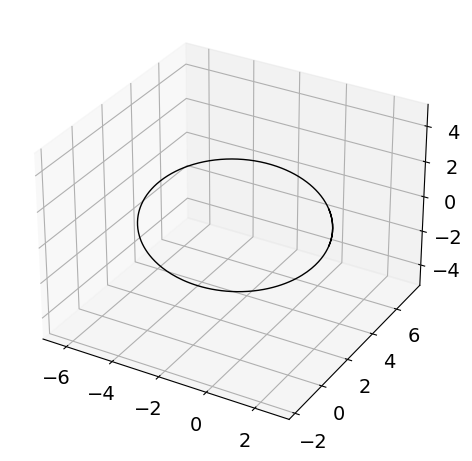

In [191]:
rs_sepl, vs_sepl = pc.doscuerpos_solucion(1 * m_sepl, r_sepl, v_sepl, ts)
fig = pc.plot_doscuerpos_3d(rs_sepl, vs_sepl)

**Observación:** encontramos que la aproximación que realizamos para hallar el tiempo de integración ha funcionado, debido a que se logra apreciar una órbita cerrada del vector relativo

##Sistema e - ( p - l)

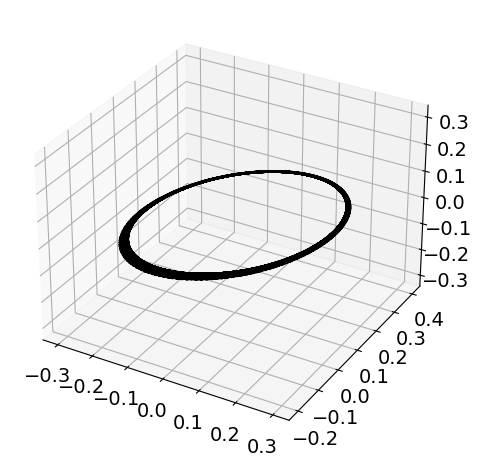

In [192]:
rs_epl, vs_epl = pc.doscuerpos_solucion(1 * m_epl, r_epl, v_epl, ts)
fig = pc.plot_doscuerpos_3d(rs_epl, vs_epl)

##Sistema  p - l

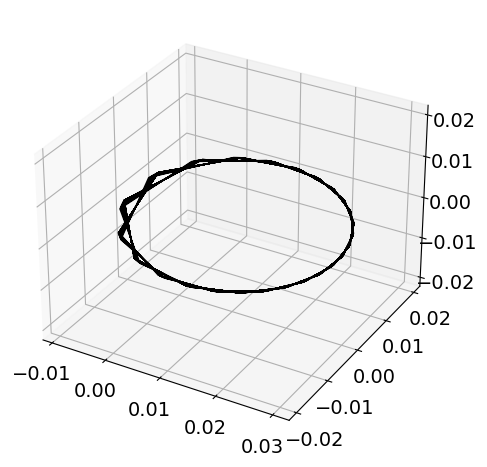

In [193]:
rs_pl, vs_pl = pc.doscuerpos_solucion(1 * m_pl, r_pl, v_pl, ts)
fig = pc.plot_doscuerpos_3d(rs_pl, vs_pl)

#3.
 Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir de la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

Ahora, lo que vamos a hacer es una reconstrucción de la órbita de las partículas

Comenzamos por definir los valores para la posición y la velocidad del centro de masa de todo el sistema.

In [194]:
RCM_sepl = np.zeros_like(rs_sepl)
VCM_sepl = np.zeros_like(rs_sepl)

Lo primero que obtenemos es la posición (y velocidad) de s y RCM_epl a lo largo del tiempo en términos de las coordenadas de Jacobi RCM_sepl (VCM_sepl) y los vectores relativos rs_sepl (vs_sepl)

In [195]:
rs_s = RCM_sepl + (m_epl / m_sepl) * rs_sepl
vs_s = VCM_sepl + (m_epl / m_sepl) * vs_sepl

RCM_epl = RCM_sepl - (ms / m_sepl) * rs_sepl
VCM_epl = VCM_sepl - (ms / m_sepl) * vs_sepl

Comenzamos con la segunda parte de la jerarquía, donde las coordenadas de Jacobi en este caso son RCM_epl, VCM_epl, rs_epl y  vs_epl.

In [196]:
rs_e = RCM_epl + (m_pl / m_epl) * rs_epl
vs_e = VCM_epl + (m_pl / m_epl) * vs_epl

RCM_pl = RCM_epl - (me / m_epl) * rs_epl
VCM_pl = VCM_epl - (me / m_epl) * vs_epl

Finalmente, resolvemos para el último par que nos queda de la jerarquía la posición (y velocidad) de p y l, a través de las coordenadas de Jacobi RCM_pl, VCM_pl, rs_pl, vs_pl.

In [197]:
rs_p = RCM_pl + (ml / m_pl) * rs_pl
vs_p = VCM_pl + (ml / m_pl) * vs_pl

rs_l = RCM_pl - (mp / m_pl) * rs_pl
vs_l = VCM_pl - (mp / m_pl) * vs_pl

#4.
Haga gráficos de las posiciones y una animación que muestre la trayectoria de las partículas.

Ahora, como ya tenemos el sistema reconstruido la idea es realizar la gráfica de las posiciones de cada uno de los cuerpos

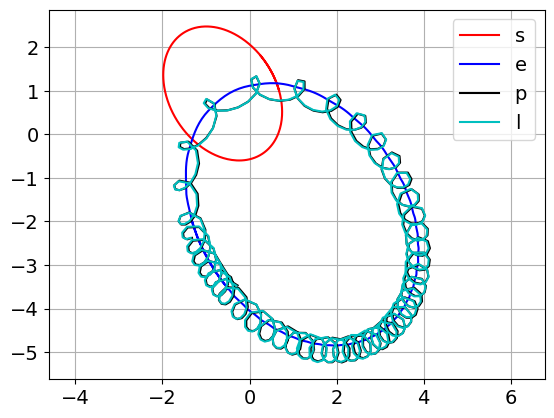

In [198]:
plt.plot(rs_s[:, 0], rs_s[:, 1], 'r-', label = "s")
plt.plot(rs_e[:, 0], rs_e[:, 1], 'b-', label = "e")
plt.plot(rs_p[:, 0], rs_p[:, 1], 'k-', label = "p")
plt.plot(rs_l[:, 0], rs_l[:, 1], 'c-', label = "l")

plt.axis('equal')
plt.grid()
plt.legend();

Veamos ahora cómo queda el gráfico en 3D.

Para ello juntamos en un cubo toda la información del sistema.

In [199]:
#particulas, tiempos, coordenadas
rs = np.zeros((4, len(ts), 3))
vs = np.zeros((4, len(ts), 3))

rs[0] = rs_s
rs[1] = rs_e
rs[2] = rs_p
rs[3] = rs_l

vs[0] = vs_s
vs[1] = vs_e
vs[2] = vs_p
vs[3] = vs_l

#graficamos
fig = pc.plot_ncuerpos_3d(rs, vs, tipo = 'plotly')

Ahora, la idea es realizar una animación que nos muestre la rayectoria de las partículas.

Para realizar la animación recuperamos la forma del código que usamos para la tarea, 2 pero con las siguientes diferencias:

- En este caso no estamos creando una simulación de rebound, por lo cual no nos preocupamos por un tiempo de integración, sino por que la cámara tome una fotografía en cada paso que se realiza.

- Como la simulación que hicimos solo nos muestra la evolución de los puntos en el tiempo, pero no imprime su trayectoria, pedimos ayuda a cha GPT con esto y nos proporciona las 4 lineas posteriores a la linea con el comentario :"Agregar un punto estático en cada iteración".
Lo que hace este código es en cada paso graficar los rs(x) y rs(y) en todos ls tiempos hasta el t (con una transparencia menor al 100% para que resalte el punto), para que a medida que avanza el punto, vaya dejando el rastro de su trayectoria.

Observación: se hace con respecto al punto t+1 y no respecto a t porque queremos que se incluya el término de la interacción actual, pues recordamos que python en este tipo de casos tomaría los valores desde cero hasta el t.

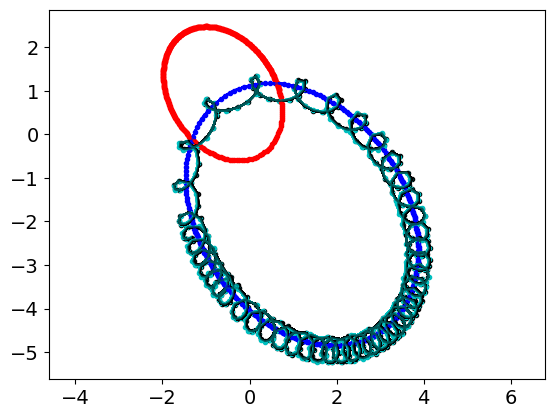

In [200]:
fig= plt.figure()
camara = Camera(fig)

for t in range(len(ts)):
  plt.plot(rs_s[t, 0], rs_s[t, 1], 'ro', markersize= 3)
  plt.plot(rs_e[t, 0], rs_e[t, 1], 'bo', markersize= 3)
  plt.plot(rs_p[t, 0], rs_p[t, 1], 'ko', markersize= 3)
  plt.plot(rs_l[t, 0], rs_l[t, 1], 'co', markersize= 3)

  # Agregar un punto estático en cada iteración
  plt.plot(rs_s[:t+1, 0], rs_s[:t+1, 1], 'r-', alpha=0.2)
  plt.plot(rs_e[:t+1, 0], rs_e[:t+1, 1], 'b-', alpha=0.2)
  plt.plot(rs_p[:t+1, 0], rs_p[:t+1, 1], 'k-', alpha=0.3)
  plt.plot(rs_l[:t+1, 0], rs_l[:t+1, 1], 'c-', alpha=0.2)

  plt.axis('equal')
  plt.grid()

  camara.snap()

In [201]:
animacion= camara.animate()

In [202]:
HTML(animacion.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

#5.
Tomando las posiciones iniciales calculadas en 3, use la rutina  `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y compare con el obtenido en 4. ¿Se ven parecidas?

Para usar `n_cuerpos_solucion` recordamos que debemos crear un diccionario que llamaremos "sistema", el cual recibe las masas de los cuerpos, y las condiciones iniciales para posición y velocidad.

Recordamos que para accedeer a la condición inicial de posición por ejemplo de s, lo hacemos a través del bloque creado previamente de la forma:

[#particula, tiempo, coordenada]

In [203]:
sistema = [
    dict(m = ms, r = rs[0, 0, :], v = vs[0, 0, :]),            #primera part, primer timepo, todas las coordenadas
    dict(m = me, r = rs[1, 0, :], v = vs[1, 0, :]),
    dict(m = mp, r = rs[2, 0, :], v = vs[2, 0, :]),
    dict(m = ml, r = rs[3, 0, :], v = vs[3, 0, :])
]

#resultados de la simulación por ncuerpos_solucion
rns,vns,rpns,vpns,cuadraturas = pc.ncuerpos_solucion(sistema,ts)

In [204]:
fig = pc.plot_ncuerpos_3d(rpns,vpns,tipo='plotly')

Al compararlo de vistazo con el resultado obtenido en el punto 4 se observa que se han obenido resultados basante similares, lo cual nos rinde cuenta de que el desarrollo por sistemas jerárquicos sirve como una buena aproximación al problema.


###Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.



---

Vamos a realizar la animación del movimiento de planeta, comparando lo obtenido con la aproximación jerárquica y con la integración precisa.

---







In [205]:
rpns[2, 0, 0], rpns[2, 0, 1], rpns[2, 0, 2]

(-1.32089946453282, -2.376829538375462, 0.0)

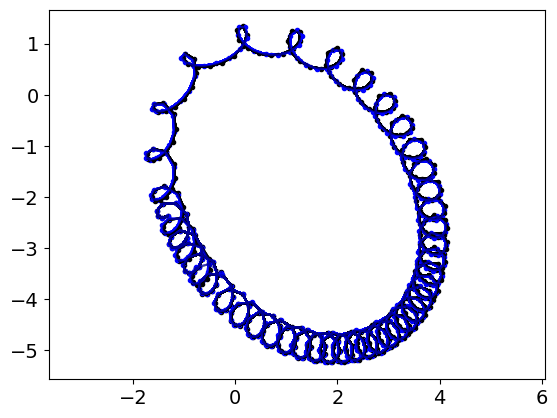

In [206]:
fig= plt.figure()
camara = Camera(fig)

for t in range(len(ts)):
  plt.plot(rs_p[t, 0], rs_p[t, 1], 'ko', markersize= 3)
  plt.plot(rpns[2, t, 0], rpns[2, t, 1], 'bo', markersize= 3)

  # Agregar un punto estático en cada iteración
  plt.plot(rs_p[:t+1, 0], rs_p[:t+1, 1], 'k-', alpha=0.3)
  plt.plot(rpns[2, :t+1, 0], rpns[2, :t+1, 1], 'b-', alpha= 0.3)

  plt.axis('equal')
  plt.grid()

  camara.snap()

In [207]:
animacion= camara.animate()

In [208]:
HTML(animacion.to_jshtml())

#6.
Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

En este caso, lo que vamos a hacer es graficar x vs. t, y vs.t, z vs. t para cada uno de los cuerpos.


''

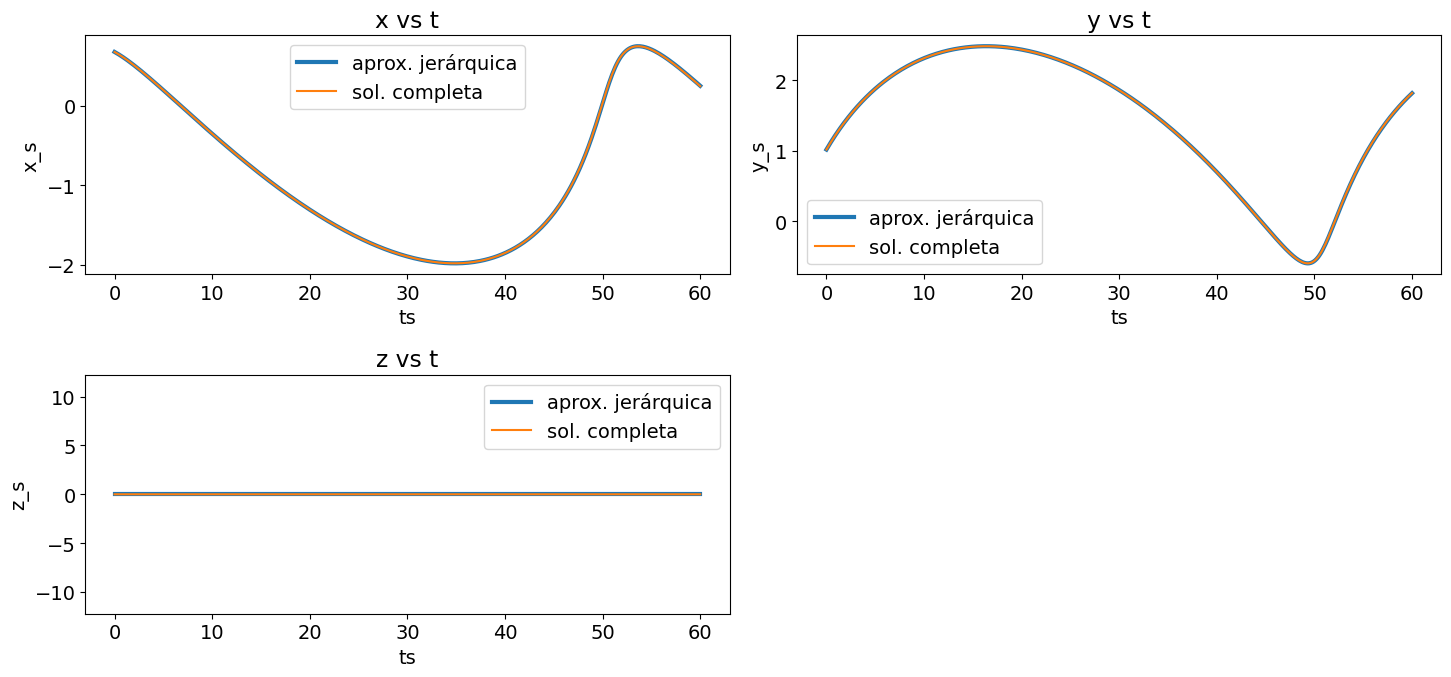

In [209]:
#cuerpo s


#aproximación jerárquica
xs_s = rs_s[:, 0]
ys_s = rs_s[:, 1]
zs_s = rs_s[:, 2]

#solución al sistema completo
xs_s_c = rpns[0, :, 0]
ys_s_c = rpns[0, :, 1]
zs_s_c = rpns[0, :, 2]

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(ts, xs_s, lw= 3, label = 'aprox. jerárquica')
ax1.plot(ts, xs_s_c, label = 'sol. completa')
ax1.set_title('x vs t')
ax1.set_xlabel('ts')
ax1.set_ylabel('x_s')
ax1.legend()

ax2.plot(ts, ys_s, lw= 3, label = 'aprox. jerárquica')
ax2.plot(ts, ys_s_c, label = 'sol. completa')
ax2.set_title('y vs t')
ax2.set_xlabel('ts')
ax2.set_ylabel('y_s')
ax2.legend()

ax3.plot(ts, zs_s, lw= 3, label = 'aprox. jerárquica')
ax3.plot(ts, zs_s_c, label = 'sol. completa')
ax3.set_title('z vs t')
ax3.set_xlabel('ts')
ax3.set_ylabel('z_s')
ax3.legend()

plt.tight_layout()
plt.axis('equal')
;

''

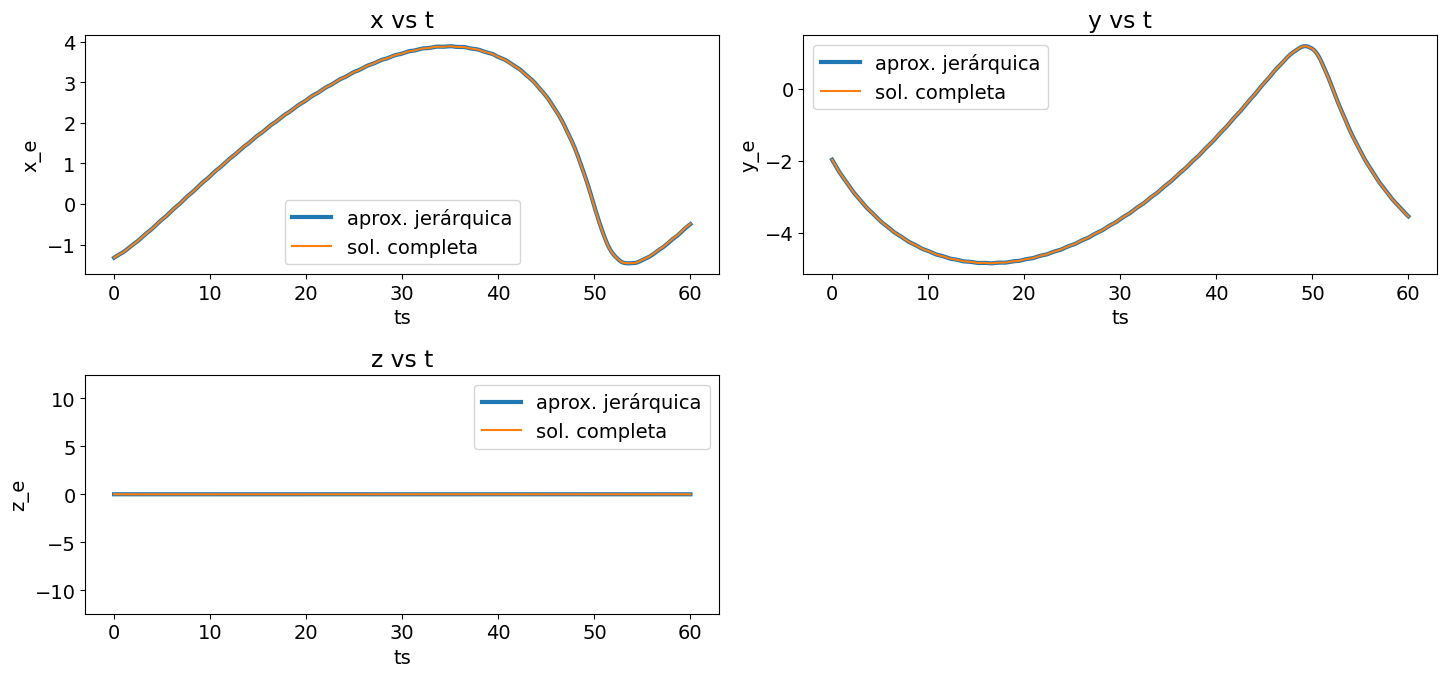

In [210]:
#cuerpo s


#aproximación jerárquica
xs_e = rs_e[:, 0]
ys_e = rs_e[:, 1]
zs_e = rs_e[:, 2]

#solución al sistema completo
xs_e_c = rpns[1, :, 0]
ys_e_c = rpns[1, :, 1]
zs_e_c = rpns[1, :, 2]

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(ts, xs_e, lw= 3, label = 'aprox. jerárquica')
ax1.plot(ts, xs_e_c, label = 'sol. completa')
ax1.set_title('x vs t')
ax1.set_xlabel('ts')
ax1.set_ylabel('x_e')
ax1.legend()

ax2.plot(ts, ys_e, lw= 3, label = 'aprox. jerárquica')
ax2.plot(ts, ys_e_c, label = 'sol. completa')
ax2.set_title('y vs t')
ax2.set_xlabel('ts')
ax2.set_ylabel('y_e')
ax2.legend()

ax3.plot(ts, zs_e, lw= 3, label = 'aprox. jerárquica')
ax3.plot(ts, zs_e_c, label = 'sol. completa')
ax3.set_title('z vs t')
ax3.set_xlabel('ts')
ax3.set_ylabel('z_e')
ax3.legend()

plt.tight_layout()
plt.axis('equal')
;

''

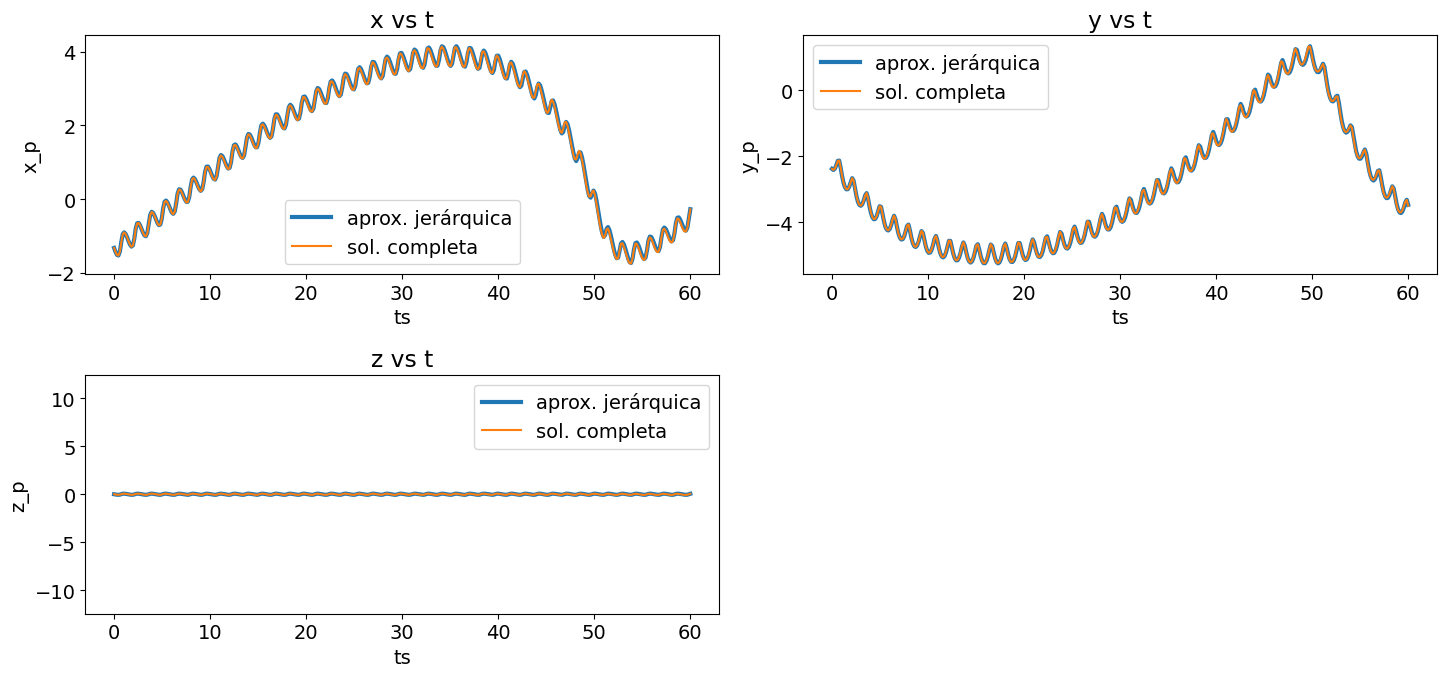

In [211]:
#cuerpo p


#aproximación jerárquica
xs_p = rs_p[:, 0]
ys_p = rs_p[:, 1]
zs_p = rs_p[:, 2]

#solución al sistema completo
xs_p_c = rpns[2, :, 0]
ys_p_c = rpns[2, :, 1]
zs_p_c = rpns[2, :, 2]

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(ts, xs_p, lw= 3, label = 'aprox. jerárquica')
ax1.plot(ts, xs_p_c, label = 'sol. completa')
ax1.set_title('x vs t')
ax1.set_xlabel('ts')
ax1.set_ylabel('x_p')
ax1.legend()

ax2.plot(ts, ys_p, lw= 3, label = 'aprox. jerárquica')
ax2.plot(ts, ys_p_c, label = 'sol. completa')
ax2.set_title('y vs t')
ax2.set_xlabel('ts')
ax2.set_ylabel('y_p')
ax2.legend()

ax3.plot(ts, zs_p, lw= 3, label = 'aprox. jerárquica')
ax3.plot(ts, zs_p_c, label = 'sol. completa')
ax3.set_title('z vs t')
ax3.set_xlabel('ts')
ax3.set_ylabel('z_p')
ax3.legend()

plt.tight_layout()
plt.axis('equal')
;

''

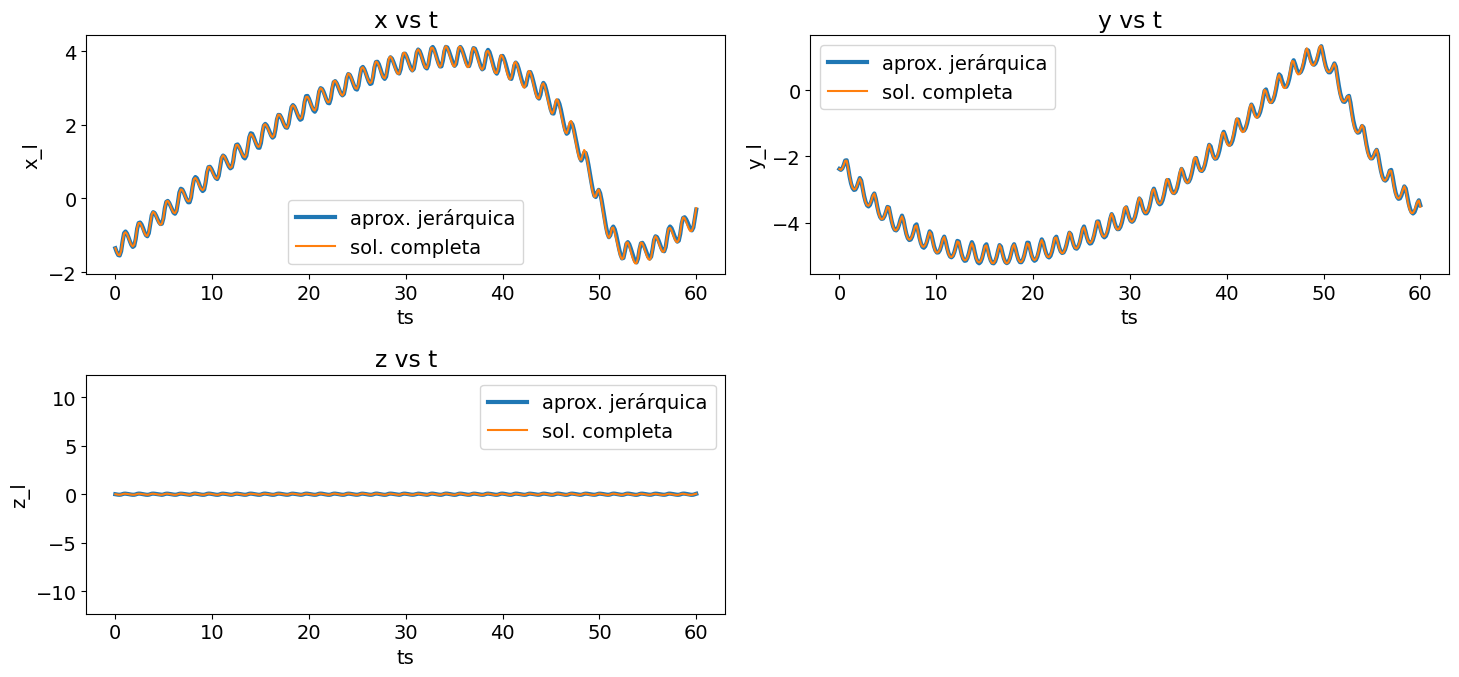

In [212]:
#cuerpo l


#aproximación jerárquica
xs_l = rs_l[:, 0]
ys_l = rs_l[:, 1]
zs_l = rs_l[:, 2]

#solución al sistema completo
xs_l_c = rpns[3, :, 0]
ys_l_c = rpns[3, :, 1]
zs_l_c = rpns[3, :, 2]

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(ts, xs_l, lw= 3, label = 'aprox. jerárquica')
ax1.plot(ts, xs_l_c, label = 'sol. completa')
ax1.set_title('x vs t')
ax1.set_xlabel('ts')
ax1.set_ylabel('x_l')
ax1.legend()

ax2.plot(ts, ys_l, lw= 3, label = 'aprox. jerárquica')
ax2.plot(ts, ys_l_c, label = 'sol. completa')
ax2.set_title('y vs t')
ax2.set_xlabel('ts')
ax2.set_ylabel('y_l')
ax2.legend()

ax3.plot(ts, zs_l, lw= 3, label = 'aprox. jerárquica')
ax3.plot(ts, zs_l_c, label = 'sol. completa')
ax3.set_title('z vs t')
ax3.set_xlabel('ts')
ax3.set_ylabel('z_l')
ax3.legend()

plt.tight_layout()
plt.axis('equal')
;

Observamos que en los 4 graficos que hemos realizado (uno para cada cuerpo) de las componentes x, y, z de la trayectoria de los cuerpos, los resultados por el lado de la aproximación jerárquica y la solución completa son muy similares; de hecho, no se aprecia diferencial alguna.

###una comparación adicional

---

Algo **adicional** que podemos hacer para comparar los resultados que se obtienen por parte de la aproximación jerárquica y la solución completa es graficar la posición de cada una de las partículas de forma individual y verificar si se aprecia alguna diferencia: esperaríamos que no haya diferencia alguna.

---




Para hacer los gráfico 3d de la posición de cada particula a lo largo del tiempo, hacemos la gráfica a través de `pc.plot_ncuerpos_3d` para que nos quede una gráfica interactiva, donde el cuerpo asociado al numero cero (0) corresponde a la solución del sistema obtenido en el punto 3 (aproximación jerárquica) y el numero uno (1) corresponde a la solución del sistema obtenido en el punto 5 (con `pc.ncuerpos_solucion`)

In [213]:
#cuerpo s

rs_S = np.zeros((2, len(ts), 3))
rs_S[0] = rs_s
rs_S[1] = rpns[0]

vs_S = np.zeros_like(rs_S)
vs_S[0] = vs_s
vs_S[1] = vpns[0]

fig = pc.plot_ncuerpos_3d(rs_S, vs_S, tipo = 'plotly', name = 's')

In [214]:
#cuerpo e

rs_E = np.zeros((2, len(ts), 3))
rs_E[0] = rs_e
rs_E[1] = rpns[1]

vs_E = np.zeros_like(rs_E)
vs_E[0] = vs_e
vs_E[1] = vpns[1]

fig = pc.plot_ncuerpos_3d(rs_E, vs_E, tipo = 'plotly', name = 'e')

In [215]:
#cuerpo p

rs_P = np.zeros((2, len(ts), 3))
rs_P[0] = rs_s
rs_P[1] = rpns[0]

vs_P = np.zeros_like(rs_P)
vs_P[0] = vs_s
vs_P[1] = vpns[0]

fig = pc.plot_ncuerpos_3d(rs_P, vs_P, tipo = 'plotly', name = 'p')

In [216]:
#cuerpo l

rs_L = np.zeros((2, len(ts), 3))
rs_L[0] = rs_s
rs_L[1] = rpns[0]

vs_L = np.zeros_like(rs_L)
vs_L[0] = vs_s
vs_L[1] = vpns[0]

fig = pc.plot_ncuerpos_3d(rs_L, vs_L, tipo = 'plotly', name = 'l')

**Comentarios acerca de los resultados:** Observamos que en la comparativa que se ha realizado para cada uno de los 3 cuerpos se obienen resultados casi exactamente iguales. La única diferencia que se aprecia resulta en una pequeña superposición de una gráfica con respecto a la otra dependiendo el ángulo desde el cual se mire.

Nuevamente comprobamos que la aproximación jerárquica es buena para nuestro caso de esudio.

#7.
 Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades convencionales: en el eje x el tiempo en días, en el eje y la energía en Joules. ¿Qué observa?

Comenzamos por hallar la energía cinética total, como la suma de la energía cinética de cada una de las partículas, usando la expresión:

$$E_K = K = \frac{1}{2}mv^2$$

Donde v es la norma de la velocidad del cuerpo.


Además tenemos en cuenta que para expresar K en unidades del SI partiendo de las unidades canónicas que traíamos, realizamos el sguiente factor de conversión:

$$K = K \frac{U_M U_L^2}{U_T^2} \times \frac{1.5184\times 10^{29} kg}{UM} \times  (\frac{1.5 \times 10^9 m}{UL})^2 \times (\frac{UT}{1.8249 \times 10^ 4 s})^2$$

y para expresar el eje x en dias:

$$t = tiempo (seg) \times \frac{1h}{3600 s} \times \frac{1d}{24h} = \frac{tiempo}{86400}$$

In [217]:
K_s = np.zeros(len(ts))
K_e = np.zeros(len(ts))
K_p = np.zeros(len(ts))
K_l = np.zeros(len(ts))

for i in range(len(ts)):
  K_s[i] = (1/2 * ms * np.linalg.norm(vs_s[i])**2)  * ( UM * (UL)**2 / UT**2)
  K_e[i] = (1/2 * me * np.linalg.norm(vs_e[i])**2)  * ( UM * (UL)**2 / UT**2)
  K_p[i] = (1/2 * mp * np.linalg.norm(vs_p[i])**2)  * ( UM * (UL)**2 / UT**2)
  K_l[i] = (1/2 * ml * np.linalg.norm(vs_l[i])**2)  * ( UM * (UL)**2 / UT**2)

K = K_s + K_e + K_p + K_l
tiempos = ts * UT

''

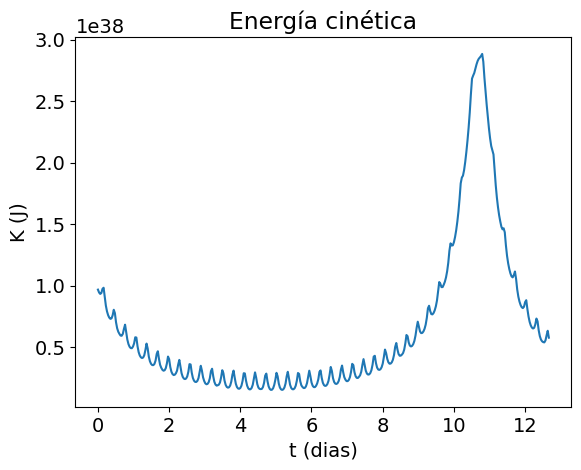

In [218]:
plt.plot(tiempos / 86400, K)
plt.title('Energía cinética')
plt.xlabel('t (dias)')
plt.ylabel('K (J)')
;

Ahora, procedemos con el cálculo de la energía potencial total a través de la expresión:

$$ U = \frac{1}{2} \sum_i \sum_{j \neq i}U_{ij}$$

donde:

$$U_{ij} = - \frac{G m_i m_j}{r_{ij}}$$

y donde $r_{ij}$ es la norma del vector $\vec{r_{ij}} = \vec{r_i} - \vec{r_j}$, y recordando que G aún la usamos en unidades canonicas.

Recordamos que en rs habíamos guardado rs_s, rs_e, rs_p, rs_l, cosa que puede resultar útil en el procedimiento para calcular la energía potencial total del sistema.

In [219]:
U = np.zeros(len(ts))
masas = np.array([ms, me, mp, ml])

for n in range(len(ts)):   #para cada valor de tiempo
  u = 0
  for i in range(4):       #sepl
    for j in range(4):     #sepl
      if i==j:
        u +=  0
      else:
        u += (masas[i] * masas[j] / (np.linalg.norm(rs[i, n] - rs[j, n]))) * (UM * (UL)**2 / UT**2)    #en Joules
  U[n] = -1/2 * u

''

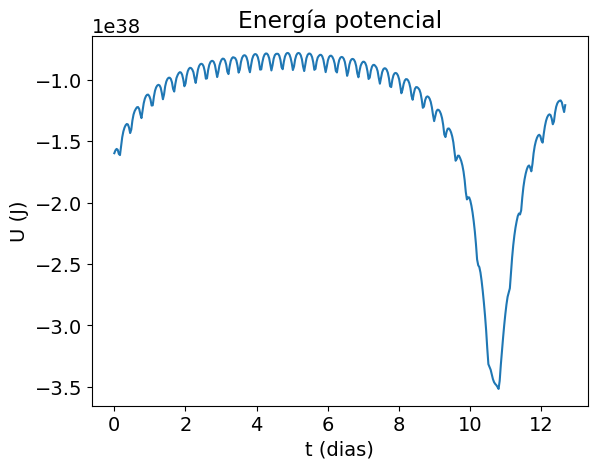

In [220]:
plt.plot(tiempos / 86400, U)
plt.title('Energía potencial')
plt.xlabel('t (dias)')
plt.ylabel('U (J)')
;

Ahora, calculamos la energía mecánica total del sistema con el paso del tiempo como la suma de la energía cinética y la energía potencia

In [221]:
M = K + U

''

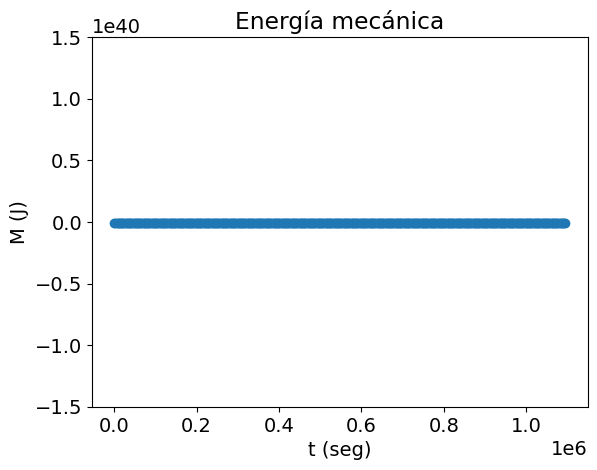

In [222]:
plt.scatter(tiempos, M)
plt.title('Energía mecánica')
plt.xlabel('t (seg)')
plt.ylabel('M (J)')
plt.ylim(-15e39, 15e39)
;

Observamos que la energía mecánica total se aproxima a una linea recta.

Esto significa que la energía se conserva, lo cual es de esperarse